# <font color = orange > Forecasting Bike Rental Demand <font />


## Introduction:

Bike-sharing systems have revolutionized urban transportation by providing a convenient and eco-friendly means of commuting within cities. These systems enable users to rent bicycles from various locations throughout a city, promoting a sustainable mode of transport. In today's data-driven world, the vast amount of data generated by bike-sharing programs offers a unique opportunity for analysis and prediction.

The "Forecasting Bike Rental Demand" project delves into the intriguing world of bike-sharing data. This initiative is part of a broader effort to harness data-driven insights for optimizing transportation systems and promoting greener urban mobility solutions.

This project embark on a journey to forecast bike rental demand by leveraging historical usage patterns and integrating weather data. By combining these two critical elements, it aim to create a predictive model that can help the Bikeshare program efficiently allocate its resources and enhance the overall user experience.

## About the dataset
The dataset is part of Kaggle competition data for the machine learning community. This dataset was provided by Hadi Fanaee Tork using data from Capital Bikeshare. The dataset   can be accesed [here](https://www.kaggle.com/competitions/bike-sharing-demand)

## Objective
The primary objectives of this project are as follows:

 **Data Exploration:** We begin by exploring the historical data provided by the Capital Bikeshare program. This phase exploratory data abalysis to gain insights into ridership trends over time.

 **Feature Engineering:** To build an effective predictive model, we will engineer relevant features from the dataset. This includes handling time-series data, extracting meaningful information, and encoding categorical variables.

 **Data Preprocessing:** Preparing the data for modeling is crucial. We will handle missing values, normalize or scale features, and split the dataset into training and testing sets.

 **Model Selection:** We will experiment with various machine learning models, including regression and possibly more advanced techniques, to forecast bike rental demand accurately.

**Evaluation:** The project's success will be assessed using Root Mean Squared Error (RMSE), to measure the accuracy of our predictions.

 **Feature Importance Analysis:** Understanding the factors that influence bike rental demand is valuable. We will conduct feature importance analysis to identify which variables play a significant role in our model's predictions.

 **Prediction and Insights:** Finally, we will apply our model to make predictions on unseen data. The insights gained from these prediction can assist Bikeshare program in optimizing resource allocation and responding proactively to changing demand patterns.

This project represents a comprehensive exploration of data analysis and predictive modeling, showcasing the ability to extract meaningful insights from real-world data.
Join me on this journey as I uncover the secrets hidden within the Capital Bikeshare data and strive to make urban transportation smarter and more sustainable.

## 1. Importing necessary libraries

Start by importing necessary libraries
1. Os
2. datetime
3. pandas
4. numpy
5. seaborn
6. matplotlib.pyplot

In [1]:
import os
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the data and dataset overview

let proceed to load the dataset. I have save a copy of the dataset in my drive.Run the code below to mount the drive click allow to access the drive from the prompt menu. The downloaded file contains three files(Train.csv, Test.csv,and submission.csv). Let load the train and test data using **.read_csv** .

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

**.head()**$~$ check first five rows

In [62]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**.tail()**$~$ check last five rows

In [63]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


**.sample()**$~$ check randomly

In [64]:
train.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10597,2012-12-07 23:00:00,4,0,1,2,14.76,18.180,93,6.0032,6,116,122
9387,2012-09-14 12:00:00,3,0,1,2,28.70,32.575,54,12.9980,119,290,409
8289,2012-07-06 18:00:00,3,0,1,1,36.90,40.150,33,16.9979,106,454,560
4382,2011-10-14 15:00:00,4,0,1,1,25.42,31.060,43,19.0012,61,169,230
3163,2011-08-01 17:00:00,3,0,1,1,31.16,34.090,45,19.9995,69,445,514


**.columns** $~$ check dataset coluns

In [65]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### Data Fields

#### Time series
**datetime** - hourly date + timestamp

### Categorical


**season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter <br>
**holiday** - whether the day is considered a holiday<br>
**workingday**- whether the day is neither a weekend nor holiday <br>
**weather** <br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy <br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>


### Numeric

**temp**- temperature in Celsius <br>
**atemp** - "feels like" temperature in Celsius <br>
**humidity** - relative humidity<br>
**windspeed** - wind speed <br>
**casual** - number of non-registered user rentals initiated <br>
**registered** - number of registered user rentals initiated <br>
**count** - number of total rentals

Get the data information

In [66]:
print(f"The Train dataset consist of {train.shape[0]} rows and {train.shape[1]} columns")

The Train dataset consist of 10886 rows and 12 columns


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


The Train dataset consist of float64(3), int64(8), object(1), the `datetime` column is in object type neeed to convert to datetime object

**Checking for missing values**

In [68]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

let get information on the dataset

In [69]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [70]:
test.shape

(6493, 9)

In [71]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 3. Exploratory Data Analysis and  Visualization

*  Summary Statistics
* Boxplot and Histogram for **count** column
* Scatterplot of **numeric** columns with **count** column
* Boxplot the **categorical** columnns with **numeric** columns
* correlation between each features

**.describe** summary statistic of data

In [72]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


As we can see, the **count** column wich is the target column has an average of 191.57, with an average temperature of 20.2 and windspeed of aproximately 13 on average.the count columns seem to contain outliers as the high difference between the 75 percentle and the max value. let plot a boxplot to further understand the distribution of the count columns

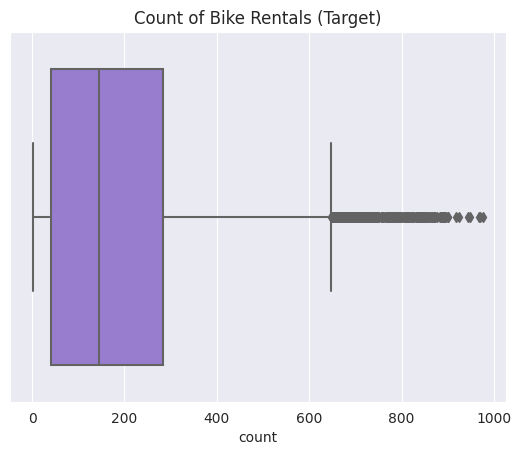

In [73]:
# boxplot of count column
sns.boxplot( data = train , x = 'count', color = 'mediumpurple')
plt.title('Count of Bike Rentals (Target)');

From the boxplot of **count** column, it is clearly visible that most of the data lies between 30 to 300 and a huge number of outliers are present in the plot

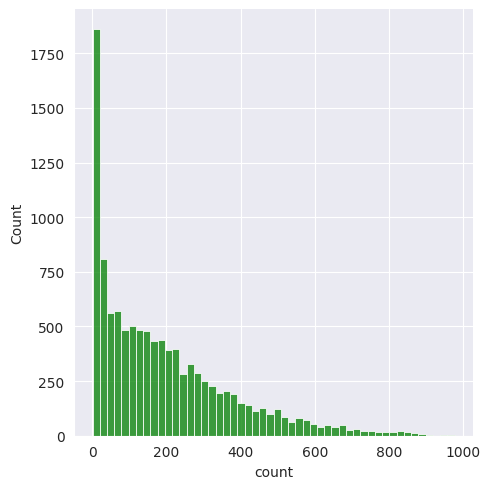

In [74]:
# Histogram of count column
sns.set_style('darkgrid')
sns.displot(train['count'], bins = 50, color = 'g');

*From the graph, we can observe that the data is skew to the right side, the density of value is more between 0 and 200*

Let proceed to find the reationship between the numeric columns and the target `count` column. i wll save this columns as **fields**

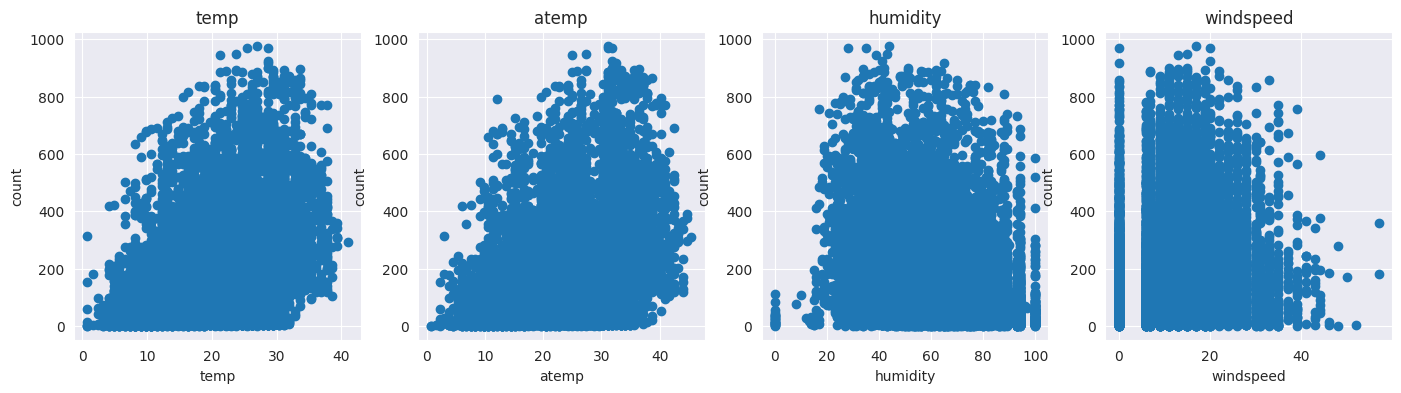

In [75]:
# scatter plot between count and numeric features
fields = [f for f in train] #save numeric coluns in field dataframe
fields = fields[5:-3] #selecting numeric column from fields
fig = plt.figure(figsize = (17,4))
for i,f in enumerate(fields):
    ax = fig.add_subplot(1,4,i+1)
    ax.scatter(train[f], train['count'])
    ax.set_ylabel('count')
    ax.set_xlabel(f)
    ax.set_title(f);


*The distribution between the numeric column and count has been spread over the entire area which mean the relationship between them is not so specific*

let further explot relationship between categorical feature and count columns

''

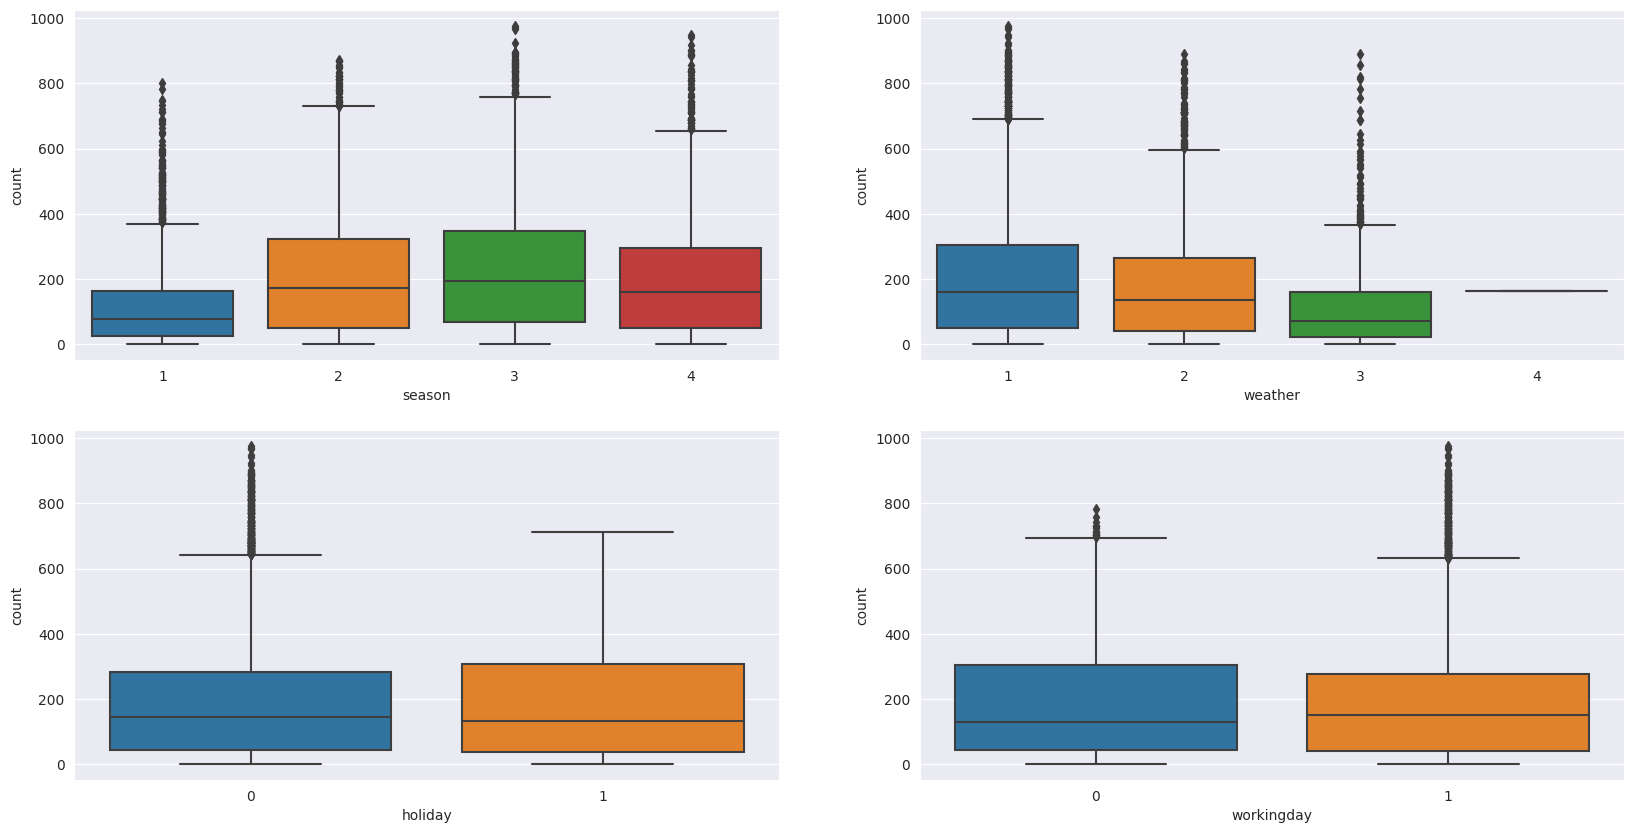

In [18]:
# boxplot between count and each categorical columns
fig,axes =plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(20,10)

sns.boxplot(data = train, y = 'count', x = 'season', ax = axes [0][0])
sns.boxplot(data = train, y = 'count', x = 'weather', ax = axes [0][1])
sns.boxplot(data = train, y = 'count', x = 'holiday', ax = axes [1][0])
sns.boxplot(data = train, y = 'count', x = 'workingday', ax = axes [1][1])

axes [0][0].set(xlabel = 'season', ylabel = 'count')
axes [0][1].set(xlabel = 'weather', ylabel = 'count')
axes [1][0].set(xlabel = 'holiday', ylabel = 'count')
axes [1][1].set(xlabel = 'workingday', ylabel = 'count')
;

### Pearson correlation between each features

<ipython-input-20-ac8ab7fb3f99>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( data = train.corr('pearson'), vmin = -1, vmax = 1,cmap = 'coolwarm',  square = True, annot = True)


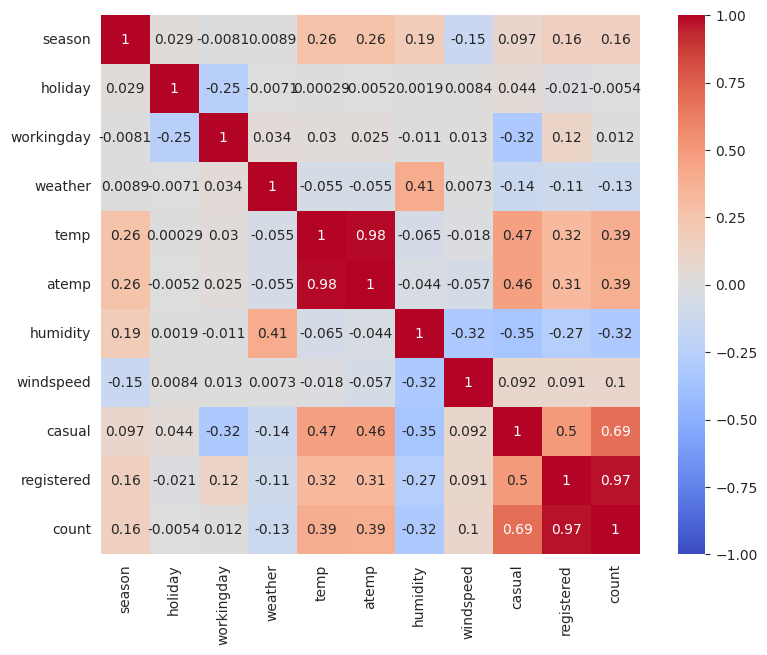

In [20]:
# correlation between each features
plt.figure( figsize = (10,7))
sns.heatmap( data = train.corr('pearson'), vmin = -1, vmax = 1,cmap = 'coolwarm',  square = True, annot = True)
plt.show();

## 4. Data cleaning and preprocessing

* Drop causual and registered
* Split **datetime** column with converting to **datetime** object
* Take log for **count** column to mitigate skew
* Eliminate outliers
* MinMax scaling the numeric columns
* split data & train set

In [76]:
# Drop causual and registered columns as it has no relevance to our analysis
train = train.drop(['casual','registered'], axis = 1)

In [77]:
# convert datetime from object type to date type and create (year, month,day, dayofweek, hour) features
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


Define function to split **datetime** to year, month,day, dayofweek, hour.

In [79]:
def split_datetime(df):
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['hour'] = df['datetime'].dt.hour
    df = df.drop('datetime', axis = 1)
    return df


In [80]:
train = split_datetime(train)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


In [81]:
test = split_datetime(test)
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


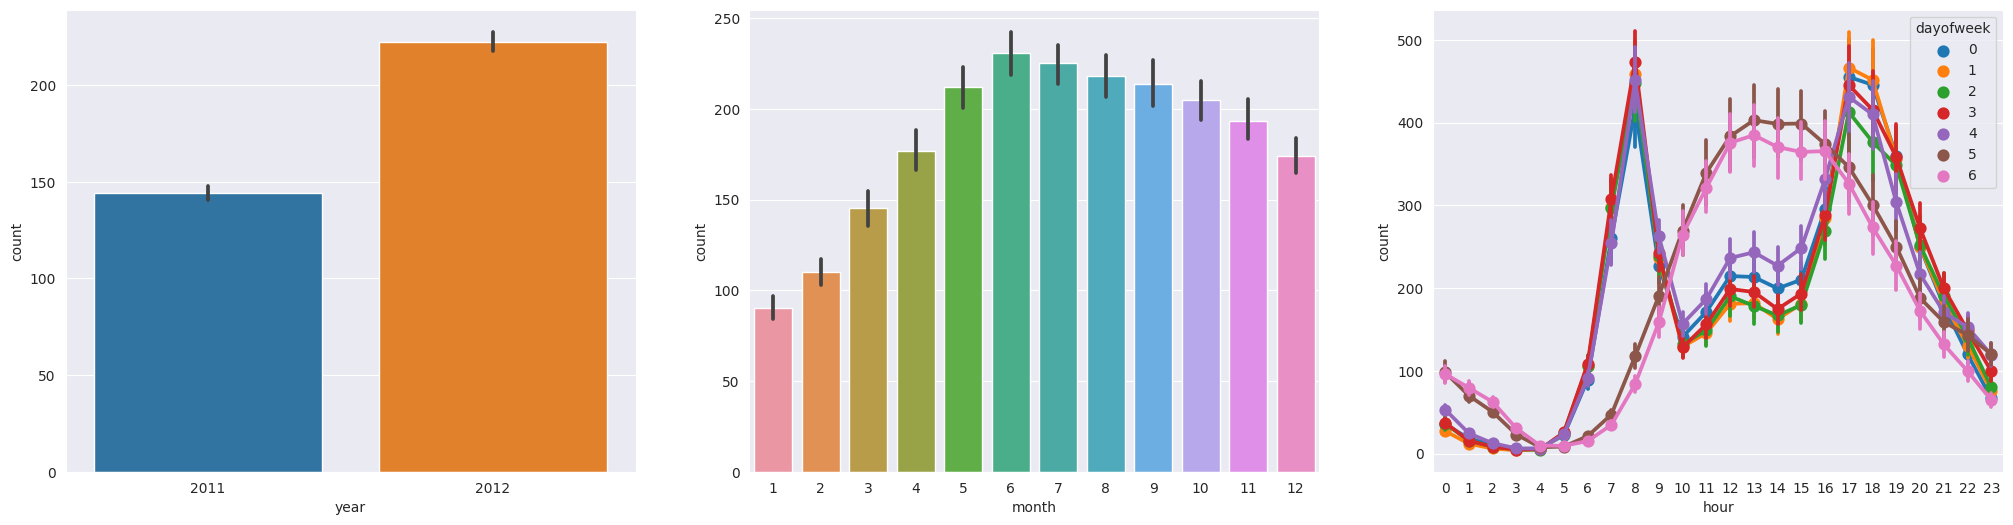

In [87]:
# boxplot of new created columns  with count column
fig,axes = plt.subplots(nrows = 1, ncols = 3)

fig.set_size_inches(25,6)
sns.barplot( data = train, y = 'count', x = 'year' , ax = axes[0])
sns.barplot( data = train, y = 'count', x = 'month' , ax = axes[1])
sns.pointplot( data = train, y = 'count', x = 'hour' , hue = 'dayofweek', ax = axes[2])

axes [0].set(xlabel = 'year', ylabel = 'count')
axes [1].set(xlabel = 'month', ylabel = 'count')
axes [2].set(xlabel = 'hour', ylabel = 'count');


There is an increase in bike rental over year 2011 to 2012. highest bike demand in month of June but lowest in January, High demand between 6 and 9 am and toward evening 4pm to 6 pm for working day but on weekends  bike demand sees a steady increase from 8am to 12 pm

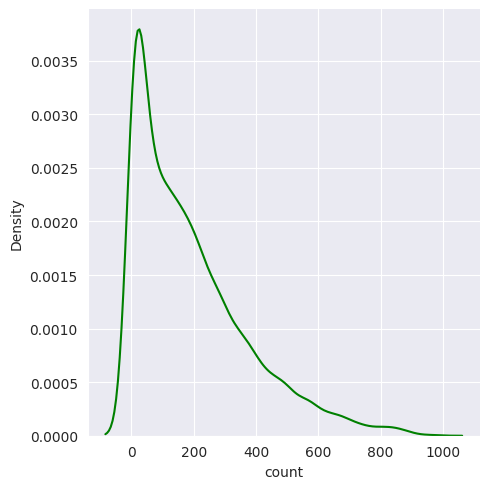

In [83]:
# count column looks skewed
sns.set_style('darkgrid')
sns.displot(train['count'],  kind = 'kde', color = 'g');

In [30]:
#take a log for count column
train['count'] = np.log(train['count'])

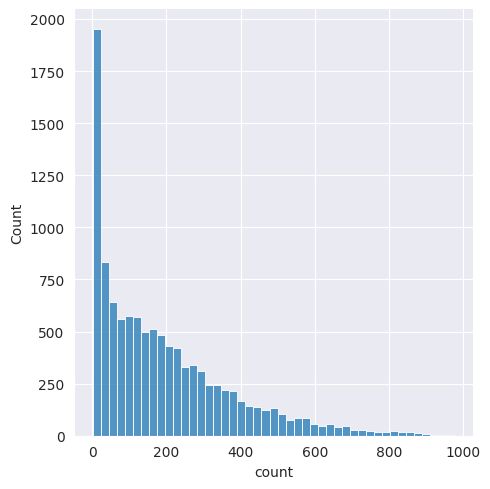

In [84]:
sns.displot(train['count']);

In [85]:
# Eliminate outliers (residual less than  std*3)
train = train[np.abs( train['count'] - train['count'].mean() ) <= (3 * train['count'].std()) ]

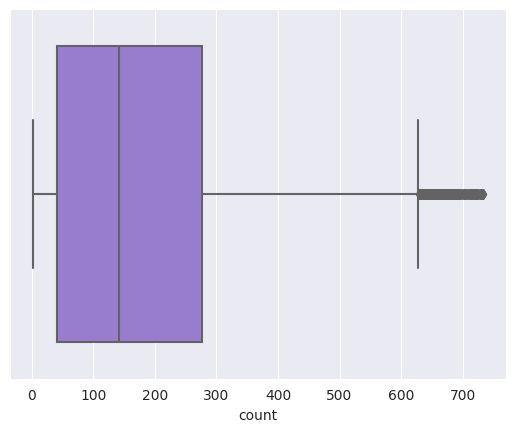

In [86]:
sns.boxplot(data = train, x = 'count', color = 'mediumpurple');

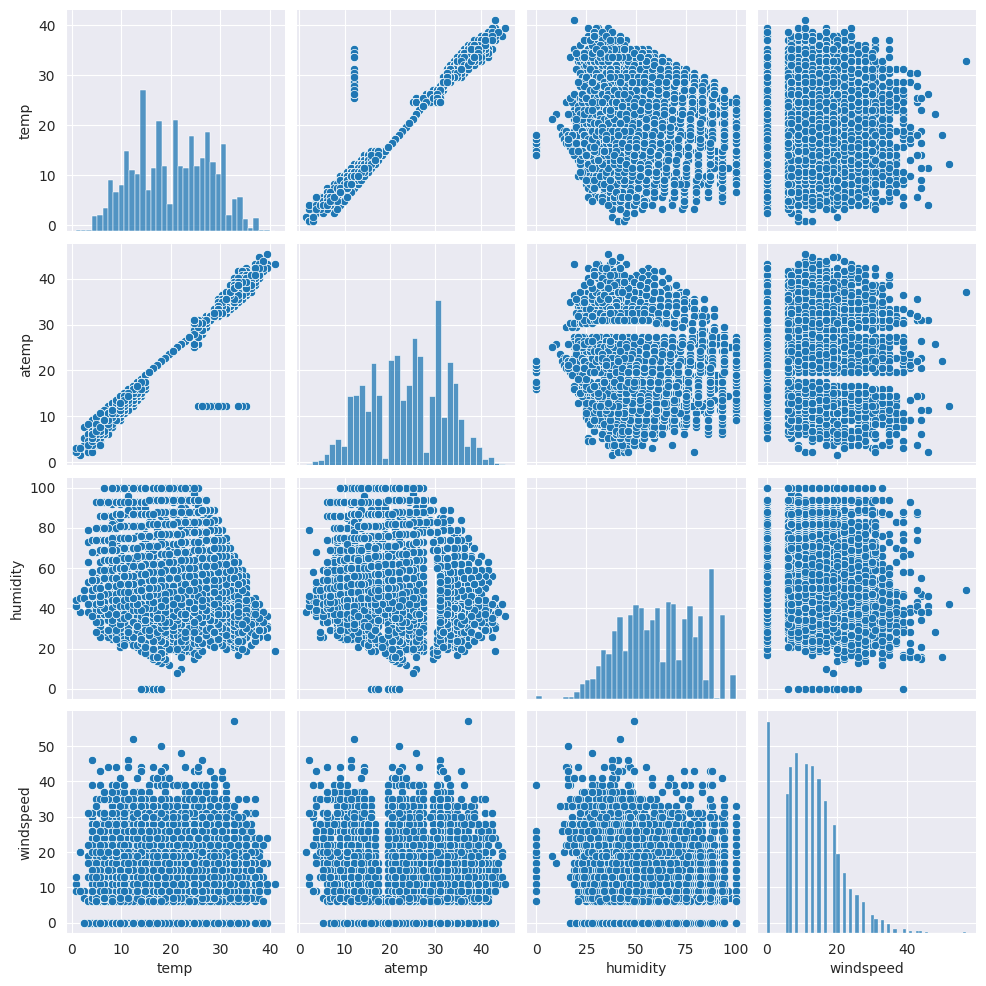

In [34]:
# pairplot of features
sns.pairplot(data = train[fields]);

In [35]:
# eleminate outlier in temp and atemp by selecting subest of the data
drop_idx = train[ (train['atemp'] > 20) & (train['atemp'] <40) & (train['temp']  > 10) & (train['temp'] < 20) ].index

In [36]:
train = train.drop(drop_idx)

### Feature scalling

In [37]:
# standard scaling of numeric features
from sklearn.preprocessing import MinMaxScaler
def scaling (df):
    scaler = MinMaxScaler()
    df[fields] = scaler.fit_transform(df[fields])
    return df

In [38]:
train = scaling(train)
test = scaling(test)

In [40]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.224490,0.293127,0.81,0.0,2.772589,2011,1,1,5,0
1,1,0,0,1,0.204082,0.275831,0.80,0.0,3.688879,2011,1,1,5,1
2,1,0,0,1,0.204082,0.275831,0.80,0.0,3.465736,2011,1,1,5,2
3,1,0,0,1,0.224490,0.293127,0.75,0.0,2.564949,2011,1,1,5,3
6,1,0,0,1,0.204082,0.275831,0.80,0.0,0.693147,2011,1,1,5,6


### Train_test split

In [41]:
# Split train & test
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split( train.drop('count', axis = 1),train['count'], test_size = 0.3)

## 4. Define Metrics(RMSLE)

In [43]:
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) **2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

## 5. Model selection and Evaluation

In [44]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import GridSearchCV

In [45]:
def evaluate(reg_cls, params = None):
    reg = reg_cls()
    if params:
        reg = GridSearchCV(reg,param_grid = params, refit = True)
    reg.fit(x_train,y_train)
    pred = reg.predict(x_test)

    y_test_exp = np.expm1(y_test)
    pred_exp = np.expm1(pred)
    print('\n',reg_cls)
    if params:
        print(reg.best_params_)
        reg = reg.best_estimator_
    print(rmsle(y_test_exp,pred_exp))
    return reg,pred_exp

In [46]:
lr_reg,pred_lr = evaluate(LinearRegression)
rg_reg,pred_rg = evaluate(Ridge)
ls_reg,pred_ls = evaluate(Lasso)
rf_reg,pred_rf = evaluate(RandomForestRegressor)
gb_reg,pred_gb = evaluate(GradientBoostingRegressor)
xg_reg,pred_xg = evaluate(XGBRegressor)
lg_reg,pred_lg = evaluate(LGBMRegressor)

params = {'n_estimators':[100*i for i in range(1,6)]}
xg_reg,pred_xg = evaluate(XGBRegressor,params)
lg_reg,pred_lg = evaluate(LGBMRegressor,params)



 <class 'sklearn.linear_model._base.LinearRegression'>
1.0182069651245282

 <class 'sklearn.linear_model._ridge.Ridge'>
1.018124611306798

 <class 'sklearn.linear_model._coordinate_descent.Lasso'>
1.1733430039612793

 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.3179732940482755

 <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
0.3910898325334633

 <class 'xgboost.sklearn.XGBRegressor'>
0.30372963365546
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 274
[LightGBM] [Info] Number of data points in the train set: 6394, number of used features: 13
[LightGBM] [Info] Start training from score 4.606530

 <class 'lightgbm.sklearn.LGBMRegressor'>
0.29562691690077325

 <class 'xgboost.sklearn.XGBRegressor'>
{'n_estimators': 100}
0.30372963365546
[LightGBM] [Warning

All the the models has a small error value. The model with the least error is LGBMRegressor which has and error of 0.28 hence the model will be selected for our prediction

## 6. Feature importances

In [48]:
def feature_importance(reg):
    plt.figure(figsize = (10,8))
    print(type(reg))
    df = pd.DataFrame( sorted(zip(x_train.columns,reg.feature_importances_)), columns = ['features','values'])
    sns.barplot(x = 'values', y = 'features', data = df.sort_values(by = 'values', ascending = False))
    plt.show()

<class 'lightgbm.sklearn.LGBMRegressor'>


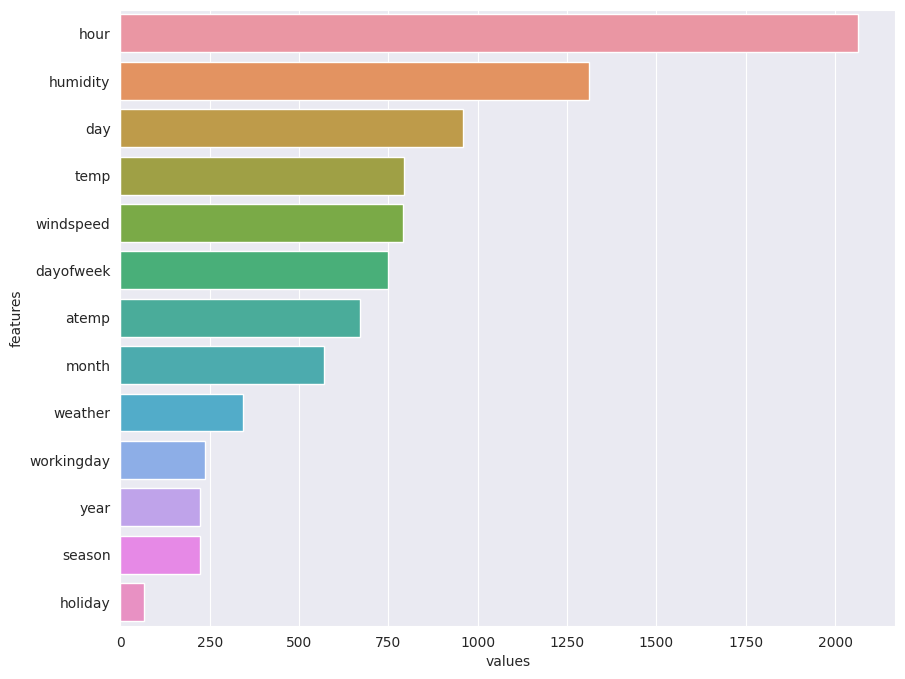

In [49]:
feature_importance(lg_reg)

as we can see from the barplot, the major contributor to bike renting is **hour of the day**

## Model Prediction

In [50]:
pred = lg_reg.predict(test)
pred_exp = np.expm1(pred)
print(pred_exp)

[  9.4722612    3.57848045   2.68951489 ... 127.14732158  82.79820228
  44.03664437]


In [52]:
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sampleSubmission.csv')

In [53]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [54]:
submission.shape

(6493, 2)

In [55]:
test.shape

(6493, 13)

In [56]:
submission['count']= pred_exp

In [57]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,9.472261
1,2011-01-20 01:00:00,3.578480
2,2011-01-20 02:00:00,2.689515
3,2011-01-20 03:00:00,1.980105
4,2011-01-20 04:00:00,2.337215


## Inferences and Insight

**Inference:**

Throughout the course of this project, several key insights have emerged regarding the factors influencing bike rental demand in the Capital Bikeshare program in Washington, D.C. These insights are derived from extensive data analysis, feature engineering, and predictive modeling:

1. **Hourly Patterns:** The hour of the day is a critical factor in predicting bike rental demand. Rentals tend to peak during rush hours, indicating that the system plays a significant role in commuters' daily routines.

2. **Weather Impact:** Weather conditions, especially humidity and windspeed, have a substantial impact on bike rentals. High humidity and unfavorable wind conditions can deter potential riders.

3. **Day of the Week:** The day of the week also affects demand, with morning and evening peaks on weekdays and a steady increase on weekends. This aligns with the expected commuter-oriented usage of the bike-sharing system.

4. **Feature Importance:** Feature importance analysis highlights the crucial role of these variables, validating their significance in predicting bike rental demand. Further, engineered features, including interactions and transformations, have been effective in improving model performance.

5. **Model Selection:** The LightGBM Regressor consistently outperforms other models in forecasting bike rental demand. Its ability to handle complex interactions and feature importance analysis makes it a suitable choice for this task.

6. **Predictive Accuracy:** The model achieves a low Mean Squared Error (MSE) or Root Mean Squared Error (RMSE), indicating that it can provide reliable forecasts, which is crucial for efficient resource allocation.

---

**Conclusion:**

In conclusion, this project has successfully addressed the task of forecasting bike rental demand in the Capital Bikeshare program in Washington, D.C. By combining historical usage patterns with weather data, we have gained valuable insights into the dynamics of urban bike sharing.

The hour of the day, weather conditions, and day of the week have been identified as pivotal factors influencing bike rental demand. Leveraging these insights, the LightGBM Regressor has been developed into an accurate predictive model. This model can assist the Capital Bikeshare program in optimizing bike availability, thereby improving user satisfaction and promoting sustainable urban mobility.

The project not only demonstrates the application of data science techniques in real-world transportation problems but also highlights the importance of data-driven decision-making in optimizing urban transportation systems. These findings can serve as a foundation for further research and initiatives aimed at enhancing the efficiency and sustainability of bike-sharing programs in urban areas.

In the broader context, this project underscores the power of data-driven solutions in addressing urban mobility challenges and contributes to the promotion of eco-friendly transportation alternatives. It also showcases the potential of machine learning models in forecasting demand for various services, laying the groundwork for more efficient and responsive urban systems.

By `Job Moses Ubeh`